집에 가서 참고할 것

https://lsjsj92.tistory.com/357

## colab 에서 진행할 경우 (이외 건너뛰어도 무방)

In [1]:
# to find the directory you're in ,
!ls
#if you wanna go into a folder (say samplefolder)
%cd /content/drive/My Drive

drive  sample_data
/content/drive/My Drive


In [2]:
import os
os.getcwd()

'/content/drive/My Drive'

In [0]:
# !unzip whole.zip -d whole

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: whole/x-ray/fracture_resize_reverse/241l.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/1061r.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/111r.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/1124r.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/1331l.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/392r.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/238r.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/187l.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/168l.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/492l.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/1348r.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/1262l.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/257l.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/1327l.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/1098r.jpg  
  inflating: whole/x-ray/fracture_resize_reverse/1132r.jp

## Load module

In [3]:
from __future__ import print_function, division

# from keras import optimizers, initializers, regularizers, metrics
from keras.datasets import mnist
from keras.layers.merge import _Merge
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.preprocessing.image import load_img,img_to_array, ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input

# from functools import partial

import keras.backend as K

import matplotlib.pyplot as plt
from matplotlib.image import imread

# import os
import sys
import glob

import numpy as np

Using TensorFlow backend.


## Source Data 확인

In [0]:
# /content/drive/My Drive/whole/x-ray/Normal_resize_reverse_crop
# /content/drive/My Drive/whole/x-ray/fracture_resize_reverse_crop

In [0]:
path_normal ='./whole/x-ray/Normal_resize_reverse'
path_fracture = './whole/x-ray/fracture_resize_reverse'

In [0]:
normal_image_path_names = []
fracture_image_path_names = []
# class_names = set()

# Get Images in folders
for file_n in glob.glob(path_normal + '/*.jpg'):
  normal_image_path_names.append(file_n)
  # class_names.add(file_n.split('/')[-2].split('_')[0].lower())

for file_f in glob.glob(path_fracture + '/*.jpg'):
  fracture_image_path_names.append(file_f)
  # class_names.add(file_f.split('/')[-2].split('_')[0].lower())

# print('class_name: ', class_names)

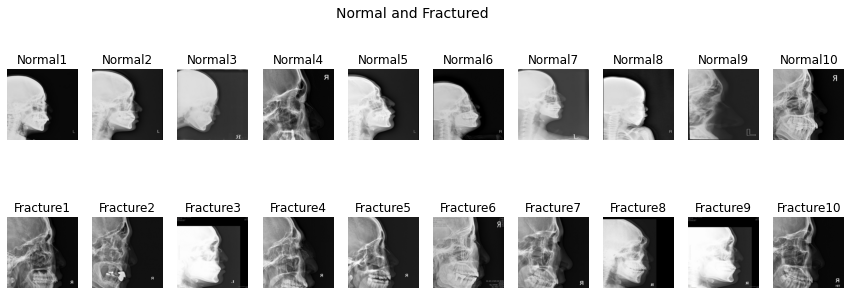

In [6]:
# Check if training data looks all right

fig, axs = plt.subplots(2, 10, figsize=(15, 5))
for i in range(10) :
  img_normal = imread(normal_image_path_names[i])
  img_fracture = imread(fracture_image_path_names[i])
  fig.suptitle('Normal and Fractured', fontsize=14)
  axs[0, i].set_axis_off()
  axs[0, i].set_title('Normal{}'.format(i+1))
  axs[0, i].imshow(img_normal, cmap='gray')
  axs[1, i].set_axis_off()
  axs[1, i].set_title('Fracture{}'.format(i+1))
  axs[1, i].imshow(img_fracture, cmap='gray')

In [7]:
print(img_normal.shape)
print(img_fracture.shape)

# IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = img_normal.shape
# print(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

(640, 640, 3)
(640, 640, 3)


In [8]:
print(len(normal_image_path_names))
print(len(fracture_image_path_names))

745
1234


## Build VGG-16 model

In [0]:
def vggncnn(input_size=(224, 224, 3)):
  input_tensor = Input(shape=input_size, dtype = 'float32', name='input')


  z1 = ZeroPadding2D((1, 1))(input_tensor)
  c1 = Conv2D(64, (3, 3), activation='relu')(z1)
  z1 = ZeroPadding2D((1,1))(c1)
  c1 = Conv2D(64, (3, 3), activation='relu')(z1)
  
  p1 = MaxPooling2D((2, 2), strides=(2, 2))(c1)

  z2 = ZeroPadding2D((1,1))(p1)
  c2 = Conv2D(128, (3, 3), activation='relu')(z2)
  z2 = ZeroPadding2D((1,1))(c2)
  c2 = Conv2D(128, (3, 3), activation='relu')(z2)

  p2 = MaxPooling2D((2,2), strides=(2,2))(c2)

  z3 = ZeroPadding2D((1,1))(p2)
  c3 = Conv2D(256, (3, 3), activation='relu')(z3)
  z3 = ZeroPadding2D((1,1))(c3)
  c3 = Conv2D(256, (3, 3), activation='relu')(z3)
  z3 = ZeroPadding2D((1,1))(c3)
  c3 = Conv2D(256, (3, 3), activation='relu')(z3)

  p3 = MaxPooling2D((2,2), strides=(2,2))(c3)

  z4 = ZeroPadding2D((1,1))(p3)
  c4 = Conv2D(512, (3, 3), activation='relu')(z4)
  z4 = ZeroPadding2D((1,1))(c4)
  c4 = Conv2D(512, (3, 3), activation='relu')(z4)
  z4 = ZeroPadding2D((1,1))(c4)
  c4 = Conv2D(512, (3, 3), activation='relu')(z4)

  p4 = MaxPooling2D((2,2), strides=(2,2))(c4)

  z5 = ZeroPadding2D((1,1))(p4)
  c5 = Conv2D(512, (3, 3), activation='relu')(z5)
  z5 = ZeroPadding2D((1,1))(c5)
  c5 = Conv2D(512, (3, 3), activation='relu')(z5)
  z5 = ZeroPadding2D((1,1))(c5)
  c5 = Conv2D(512, (3, 3), activation='relu')(z5)

  p5 = MaxPooling2D((2,2), strides=(2,2))(c5)

  c6 = Conv2D(4096, (7,7), activation = 'relu')(p5)
  c6 = Dropout(0.5)(c6)
  c6 = Conv2D(4096, (1, 1), activation = 'relu')(c6)
  c6 = Dropout(0.5)(c6)
  c6 = Conv2D(2622, (1, 1))(c6)

  f = Flatten()(c6)

  output_tensor = Activation('sigmoid')(f)

  return Model(input_tensor, output_tensor)


# # Remove Last Softmax layer and get model upto last flatten layer with outputs 2622 units
# classifier = vgg()
# classifier = vgg(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [19]:
# define model


classifier = vggncnn()
classifier.compile(optimizer=RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_27 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_28 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_29 (ZeroPaddi (None, 114, 114, 64)      0   

In [0]:
# !apt-get install tree

In [0]:
# !tree -d

## Train set, Test set 디렉토리 분류

 classifier\
   ├── test\
   │   ├── fracture\
   │   └── normal\
   └── train\
  ----      ├── fracture\
  ----      └── normal



Ref:\
https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

In [11]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

## Step1
# create directories
dataset_home = './whole/x-ray/classifier/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['fracture/', 'normal/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
print('== Step1 is done ==')


## Step2
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.3
# copy training dataset images into subdirectories
'''
path_normal ='./whole/x-ray/Normal_resize_reverse_crop'
path_fracture = './whole/x-ray/fracture_resize_reverse_crop'
'''
i = 0
x_train = []
y_train = []
x_test = []
y_test = []
class_names = set()
src_path = [path_fracture, path_normal]
for path in src_path:
  for file in listdir(path):
    src = path + '/' + file
    lab_dir = path.split('/')[-1].split('_')[0].lower()
    if random() > val_ratio:
      dst_dir = 'train/'
      dst = dataset_home + dst_dir + lab_dir + '/'  + file
      class_names.add(lab_dir)
      copyfile(src, dst)
      
      # img = load_img(dst)
      # img = img_to_array(img)
      # img = np.expand_dims(img, axis=0)
      # img = preprocess_input(img)
      # img_encode = vgg(img)
      # x_train.append(np.squeeze(K.eval(img_encode)).tolist())
      # x_train.append(np.squeeze(img))
    else:
      dst_dir = 'test/'
      dst = dataset_home + dst_dir + lab_dir + '/'  + file
      class_names.add(lab_dir)
      copyfile(src, dst)

      # img = load_img(dst)
      # img = img_to_array(img)
      # img = np.expand_dims(img, axis=0)
      # img = preprocess_input(img)
      # img_encode = vgg(img)
      # x_test.append(np.squeeze(K.eval(img_encode)).tolist())
      # x_test.append(np.squeeze(img))
  # y_train.append(i)
  # y_test.append(i)
  # i = i + 1
print('== Step2 is done ==')

== Step1 is done ==
== Step2 is done ==


In [30]:
# print(class_names)
# print(y_train)

{'fracture', 'normal'}
[0, 1]


In [36]:
# history = classifier.fit(x_train, validation_data=x_test, epochs = 10, batch_size = 10)

ValueError: ignored

In [11]:
# dataset_home = './whole/x-ray/classifier/'
# dst_dir = 'train/'
# dst_dir = 'test/'
# dst = dataset_home + dst_dir + lab_dir + '/'  + file  (lab_dir은 fracture, normal --> class_ in class_names)


# x_train = []
# y_train = []
# train_folders = os.listdir(dataset_home + 'train/')
# train_rep=dict()
# for i, class_ in enumerate(train_folers):
#   train_rep[i] = class_
#   img = load_img(dst)





# #Prepare Training Data
# x_train=[]
# y_train=[]
# person_folders=os.listdir(path+'/Images_crop/')
# person_rep=dict()



# for i,person in enumerate(person_folders):
#   person_rep[i]=person
#   image_names=os.listdir('Images_crop/'+person+'/')
#   for image_name in image_names:
#     img=load_img(path+'/Images_crop/'+person+'/'+image_name,target_size=(224,224))
#     img=img_to_array(img)
#     img=np.expand_dims(img,axis=0)
#     img=preprocess_input(img)
#     img_encode=vgg_face(img)
#     x_train.append(np.squeeze(K.eval(img_encode)).tolist())
#     y_train.append(i)

# #Prepare Test Data
# x_test=[]
# y_test=[]
# person_folders=os.listdir(path+'/Test_Images_crop/')
# for i,person in enumerate(person_folders):
#   image_names=os.listdir('Test_Images_crop/'+person+'/')
#   for image_name in image_names:
#     img=load_img(path+'/Test_Images_crop/'+person+'/'+image_name,target_size=(224,224))
#     img=img_to_array(img)
#     img=np.expand_dims(img,axis=0)
#     img=preprocess_input(img)
#     img_encode=vgg_face(img)
#     x_test.append(np.squeeze(K.eval(img_encode)).tolist())
#     y_test.append(i)




# '''
# path_normal ='./whole/x-ray/Normal_resize_reverse_crop'
# path_fracture = './whole/x-ray/fracture_resize_reverse_crop'
# '''
# src_path = [path_fracture, path_normal]
# for path in src_path:
#   for file in listdir(path):
#     src = path + '/' + file
#     lab_dir = path.split('/')[-1].split('_')[0].lower()
#     if random() > val_ratio:
#       dst_dir = 'train/'
#       dst = dataset_home + dst_dir + lab_dir + '/'  + file
#       copyfile(src, dst)


FileNotFoundError: ignored

In [0]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [0]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [0]:
# Save test and train data for later use
np.save('train_data', x_train)
np.save('train_labels', y_train)
np.save('test_data', x_test)
np.save('test_labels', y_test)

In [0]:
# Load saved data
x_train=np.load('train_data.npy')
y_train=np.load('train_labels.npy')
x_test=np.load('test_data.npy')
y_test=np.load('test_labels.npy')

In [25]:
# crop 이전
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = datagen.flow_from_directory('./whole/x-ray/classifier/train/',
	class_mode='binary', batch_size=3, target_size=(224, 224))
test_it = datagen.flow_from_directory('./whole/x-ray/classifier/test/',
	class_mode='binary', batch_size=3, target_size=(224, 224))

# fit model
history = classifier.fit_generator(train_it, steps_per_epoch=len(train_it),	
                                   validation_data=test_it, validation_steps=len(test_it), epochs=1, verbose=1)

Found 1401 images belonging to 2 classes.
Found 578 images belonging to 2 classes.
Epoch 1/1


ValueError: ignored

In [0]:
# evaluate model
_, acc = classifier.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

In [0]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

In [0]:
# from keras import layers, models, optimizers


# conv_base = VGG16(weights='imagenet',
#                   include_top=False,
#                   input_shape=(224, 224, 3))

# model = models.Sequential()
# model.add(conv_base)
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# conv_base.trainable = False

# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(lr=2e-5),
#               metrics=['acc'])

In [0]:
# from keras.applications.vgg16 import preprocess_input
# from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# # The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(224, 224), # resize all images to 224 x 224
#     batch_size=50,
#     class_mode='binary') # because we use binary_crossentropy loss we need binary labels

# validation_generator = test_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(224, 224), # resize all images to 224 x 224
#     batch_size=50,
#     class_mode='binary')

In [0]:
# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=320, # batches in the generator are 50, so it takes 320 batches to get to 16000 images
#     epochs=30,
#     validation_data=validation_generator,
#     validation_steps=90) # batches in the generator are 50, so it takes 90 batches to get to 4500 images

In [0]:
# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(224, 224),
#     batch_size=50,
#     class_mode='binary')

# test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
# print('test acc:', test_acc)

In [0]:
# conv_base = VGG16(weights='imagenet',
#                   include_top=False,
#                   input_shape=(224, 224, 3))

# conv_base.trainable = True

# set_trainable = False
# for layer in conv_base.layers:
#     if layer.name == 'block5_conv1':
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False


# model = models.Sequential()
# model.add(conv_base)
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-5),
#               metrics=['acc'])

In [0]:
# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=320, # batches in the generator are 50, so it takes 320 batches to get to 16000 images
#     epochs=30,
#     validation_data=validation_generator,
#     validation_steps=90) # batches in the generator are 50, so it takes 90 batches to get to 4500 images

In [0]:
# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(224, 224),
#     batch_size=50,
#     class_mode='binary')

# test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
# print('test acc:', test_acc)

In [0]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 300,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000)


# 출처: https://3months.tistory.com/199 [Deep Play]

output = classifier.predict_generator(test_set, steps=5)
print(test_set.class_indices)
print(output)


# 출처: https://3months.tistory.com/199 [Deep Play]

In [0]:
from keras import layers, models
from keras.applications import VGG16
from keras import Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
 
 
 
 
# data_list = glob('blood-cells/dataset2-master/images/TRAIN/**/*.jpeg')
# print(data_list[-1])
 
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_dir = os.path.join('./dataset/1/images/train')
val_dir = os.path.join('./dataset/1/images/val')
test_dir = os.path.join('./dataset/1/images/test')
 
# train_dir = os.path.join('./dataset/cats_and_dogs_small/train')
# val_dir = os.path.join('./dataset/cats_and_dogs_small/val')
# test_dir = os.path.join('./dataset/cats_and_dogs_small/test')
 
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, target_size=(220, 200), color_mode='rgb')
val_generator = val_datagen.flow_from_directory(val_dir, batch_size=16, target_size=(220, 200), color_mode='rgb')
 
 
 
# input_tensor = Input(shape=(220, 200, 3), dtype='float32', name='input')
 
# x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(input_tensor)
# x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.MaxPooling2D((2,2))(x)
 
# x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.MaxPooling2D((2,2))(x)
 
# x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.MaxPooling2D((2,2))(x)
 
# x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.MaxPooling2D((2,2))(x)
 
# x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.MaxPooling2D((2,2))(x)
 
# x = layers.Flatten()(x)
# x = layers.Dense(4096, kernel_initializer='he_normal')(x)
# x = layers.Dense(2048, kernel_initializer='he_normal')(x)
# x = layers.Dense(1024, kernel_initializer='he_normal')(x)
# output_tensor = layers.Dense(4, activation='softmax')(x)
 
# myvgg = Model(input_tensor, output_tensor)
# myvgg.summary()
 
 
# checkpoint = ModelCheckpoint(filepath='My_VGG_{epoch:03d}_{val_loss:.7f}.hdf5',monitor='loss', mode='min', save_best_only=True)
checkpoint = ModelCheckpoint(filepath='My_VGG_weight.hdf5', 
            monitor='loss', 
            mode='min', 
            save_best_only=True)
 
myvgg.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
 
 
history = myvgg.fit_generator(train_generator, 
            steps_per_epoch=25, 
            epochs=300, 
            validation_data=val_generator, 
            validation_steps=16, 
            callbacks=[checkpoint])
 
 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
 
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
 
plt.show()
